In [35]:
import torch
from torch import nn, utils
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

In [36]:
def GramMatrix(input):
    a, b, c, d = input.size()  # a=batch size(=1)
    # b=number of feature maps
    # (c,d)=dimensions of a f. map (N=c*d)

    features = input.view(a * b, c * d)  # resise F_XL into \hat F_XL

    G = torch.mm(features, features.t())  # compute the gram product

    # we 'normalize' the values of the gram matrix
    # by dividing by the number of element in each feature maps.
    return G.div(a * b * c * d)

test_dataset = datasets.CIFAR10(root='/data',train=False, transform=transforms.ToTensor())
test_loader = utils.data.DataLoader(test_dataset, batch_size=1)

In [37]:
stack = []

for i, batch in enumerate(test_loader):
    data = batch[0].cuda()
    stack.append(data)
    if i==10: break
    

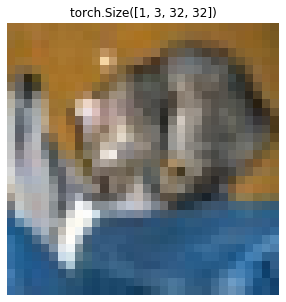

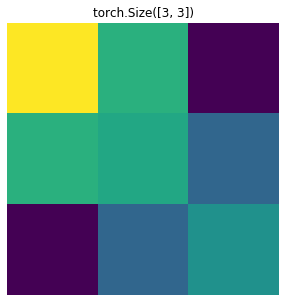

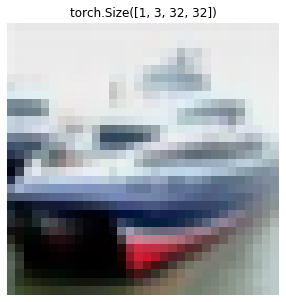

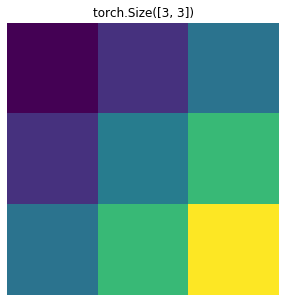

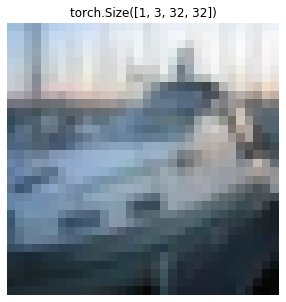

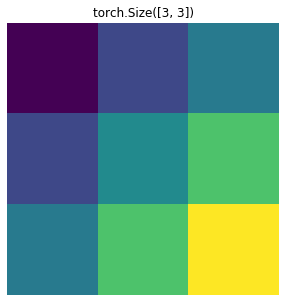

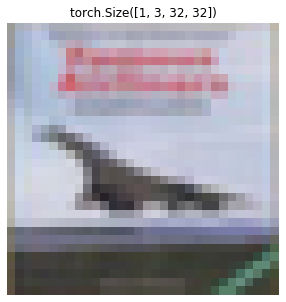

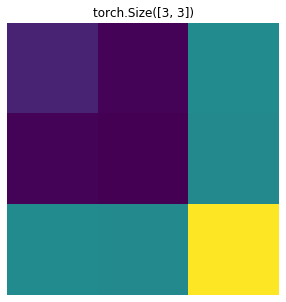

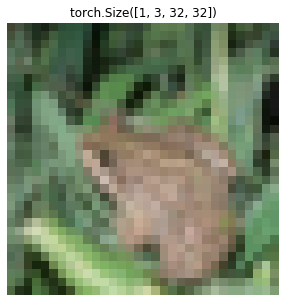

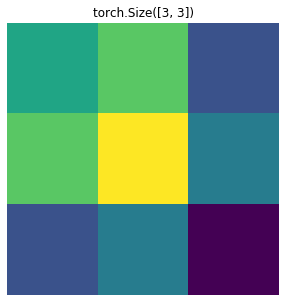

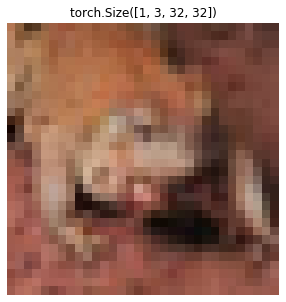

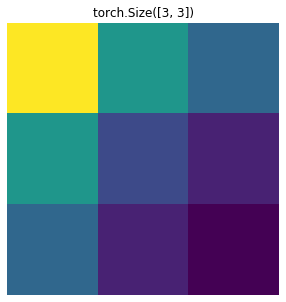

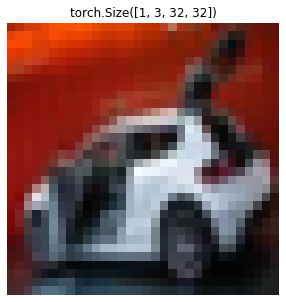

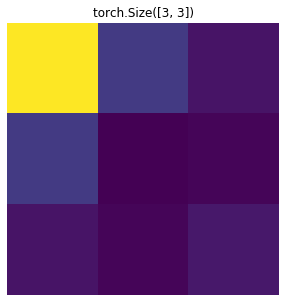

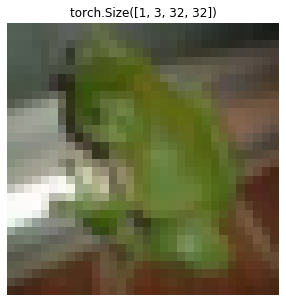

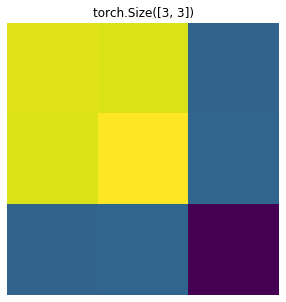

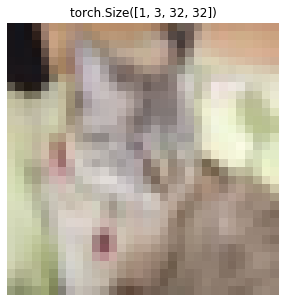

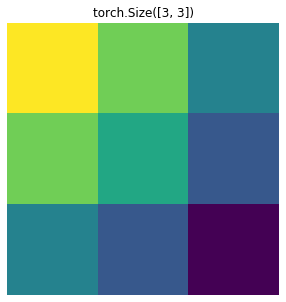

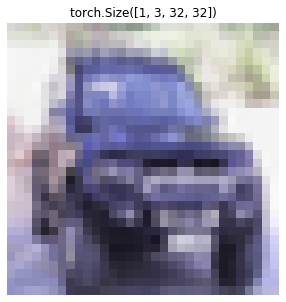

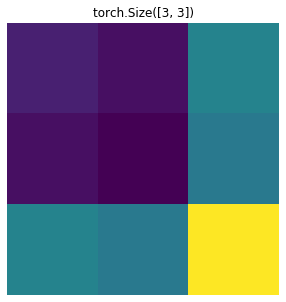

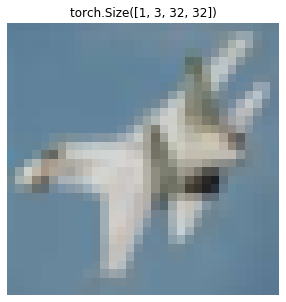

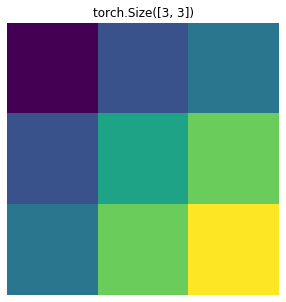

In [47]:
for i in range(len(stack)):
    
    gram = GramMatrix(stack[i])

    fig = plt.figure(figsize=(5,5))

    plt.axis('off')
    plt.title(stack[i].shape)
    plt.imshow(stack[i].detach().cpu()[0].permute(1,2,0))

    fig = plt.figure(figsize=(5,5))

    plt.axis('off')
    plt.title(gram.shape)
    plt.imshow(gram.detach().cpu())